In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
gamma = pd.read_csv('gamma.csv')
gamma

,depth/m,zone1,zone2,zone3,zone4,zone5,zone6,zone7
0,5,17.2,19.4,19.0,16.4,19.8,18.1,15.0
1,10,18.2,17.0,13.1,18.4,19.7,17.6,14.0
2,15,19.8,21.2,16.3,21.5,19.4,20.1,17.3
3,20,19.0,16.0,20.1,19.9,16.5,23.1,17.4
4,25,17.8,18.1,18.0,17.7,18.2,19.3,20.7


In [4]:
su = pd.read_csv('su.csv')
su

,depth,zone1,zone2,zone3,zone4,zone5,zone6,zone7
0,0.00,46.5,42.8,43.1,43.0,42.0,45.3,61.0
1,0.02,43.5,48.0,42.1,44.3,40.4,46.6,56.0
2,0.04,38.8,53.0,41.7,42.6,41.6,46.1,53.2
3,0.06,34.7,53.9,41.0,39.0,43.2,44.4,53.9
4,0.08,33.4,52.0,39.3,37.0,43.3,42.0,57.0
...,...,...,...,...,...,...,...,...
996,19.92,56.0,58.8,40.2,50.4,34.2,55.8,60.2
997,19.94,58.9,54.4,37.1,48.6,34.9,56.5,62.1
998,19.96,60.2,50.6,34.1,45.2,38.2,54.8,64.7
999,19.98,60.8,49.3,34.0,43.0,40.8,53.0,67.3


In [18]:
gamma.describe().loc[['mean','std']].drop('depth/m',axis=1)

,zone1,zone2,zone3,zone4,zone5,zone6,zone7
mean,18.400000,18.340000,17.300000,18.780000,18.720000,19.640000,16.880000
std,1.019804,2.039117,2.732215,1.976613,1.395349,2.169793,2.591718


In [17]:
su.describe().loc[['mean','std']].drop('depth', axis=1)

,zone1,zone2,zone3,zone4,zone5,zone6,zone7
mean,46.857143,56.239161,44.597203,51.547153,37.073526,49.830569,54.009690
std,8.468764,7.557970,9.732100,5.190861,6.058854,9.153118,11.091138


In [15]:
parameters = pd.read_csv('parameters.csv')
parameters

,Rv,distribution,parameters,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6,Zone 7
0,err,N,mean,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,err,N,std,0.10,0.10,0.10,0.10,0.10,0.10,0.10
2,su,N,mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,su,N,std,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,a,N,mean,60.00,60.00,60.00,60.00,60.00,60.00,60.00
5,a,N,std,9.00,9.00,9.00,9.00,9.00,9.00,9.00
6,gamma,N,mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,gamma,N,std,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,R,N,mean,8.00,8.00,8.00,8.00,8.00,8.00,8.00
9,R,N,std,1.60,1.60,1.60,1.60,1.60,1.60,1.60


In [32]:
parameters.iloc[2:4,3:10]=su.describe().loc[['mean','std']].drop('depth', axis=1)

parameters.iloc[6:8,3:10]=gamma.describe().loc[['mean','std']].drop('depth/m',axis=1)

parameters.to_csv("parameters.csv", sep=',', index=False, encoding='utf-8')

parameters

,Rv,distribution,parameters,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6,Zone 7
0,err,N,mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,err,N,std,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2,su,N,mean,46.857143,56.239161,44.597203,51.547153,37.073526,49.830569,54.009690
3,su,N,std,8.468764,7.557970,9.732100,5.190861,6.058854,9.153118,11.091138
4,a,N,mean,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
5,a,N,std,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
6,gamma,N,mean,18.400000,18.340000,17.300000,18.780000,18.720000,19.640000,16.880000
7,gamma,N,std,1.019804,2.039117,2.732215,1.976613,1.395349,2.169793,2.591718
8,R,N,mean,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
9,R,N,std,1.600000,1.600000,1.600000,1.600000,1.600000,1.600000,1.600000


In [ ]:
zones=su.drop('depth',axis=1).columns
zones

Index(['zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone6', 'zone7'], dtype='object')

In [ ]:
def linear_function(x, m, b):
    return m * x + b

In [ ]:
len(gamma[zone])
r=[x/len(gamma[zone]) for x in range(1,len(gamma[zone])+1)]
r


[0.2, 0.4, 0.6, 0.8, 1.0]

In [ ]:
def qqplotgeneratorsu(data):
    data = data.sort_values()
    representative_probability = [(x-.5)/len(data) for x in range(1,len(data)+1)]

    distributions = [stats.norm, stats.expon, stats.lognorm, stats.uniform]

    plt.figure(figsize=(12, 8))
    plt.suptitle("$s_u$ for " + data.name, fontsize=16)

# Iterate through the distributions
    for dist in distributions:
        plt.subplot(2, 2, distributions.index(dist) + 1)
    
    # Fit the distribution to your data
        param = dist.fit(data)
    
    # Create quantiles from the theoretical distribution
        theoretical_quantiles = dist.ppf(representative_probability, *param)

    # Create quantiles from your dataset
        # sample_quantiles = np.percentile(data, np.linspace(1, 99, 99))
        sample_quantiles = data
        # Assuming you have x_data and y_data
        params, covariance = curve_fit(linear_function, theoretical_quantiles,
                                       sample_quantiles, p0=[1, 0])
        ssr = np.sum((linear_function(theoretical_quantiles, *params) - sample_quantiles)**2)
        sst = np.sum((sample_quantiles - np.mean(sample_quantiles))**2)
        r_squared = 1 - (ssr / sst)
    # Create the QQ plot
        plt.scatter(theoretical_quantiles, sample_quantiles)
        plt.title(f'QQ Plot for {dist.name} ($R^2 = {r_squared:.5f}$)')
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Sample Quantiles")
        plt.grid(True)
    
    # Add a reference line
        plt.plot([min(theoretical_quantiles), max(theoretical_quantiles)], [min(theoretical_quantiles), max(theoretical_quantiles)], color='red', linestyle='--')

    plt.tight_layout()
    plt.show()

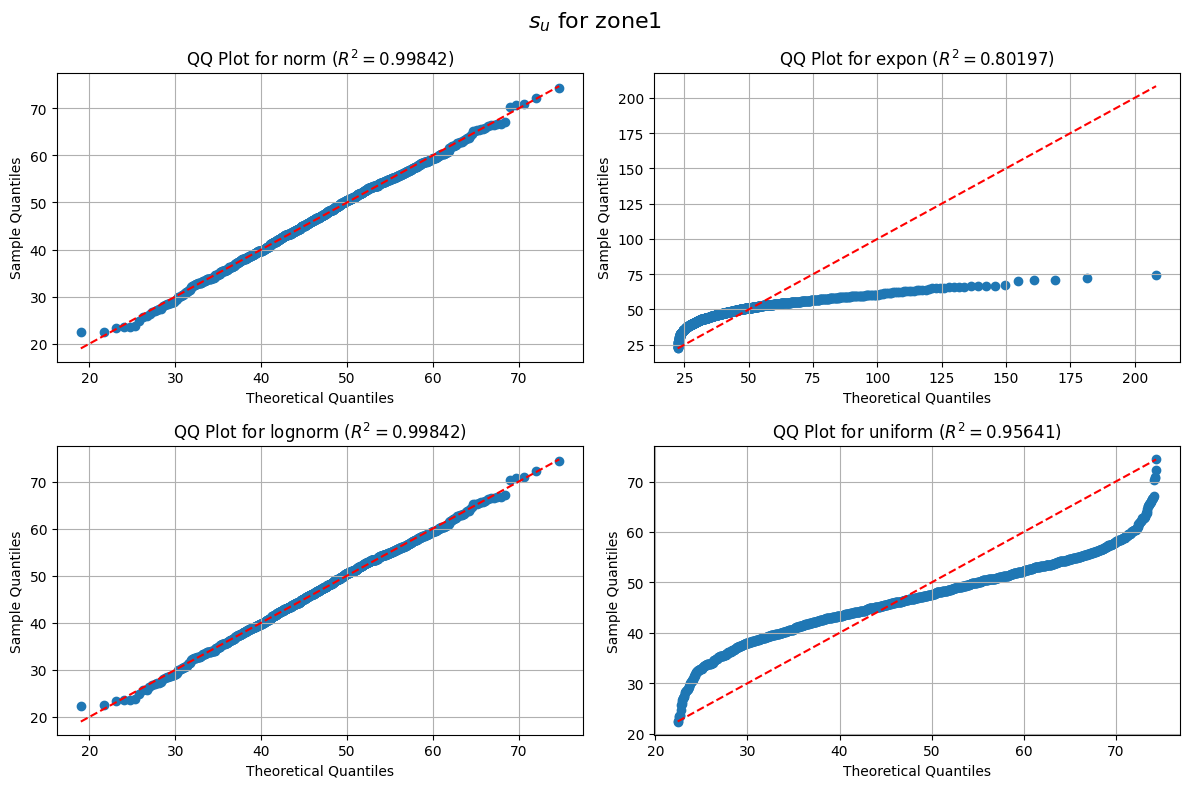

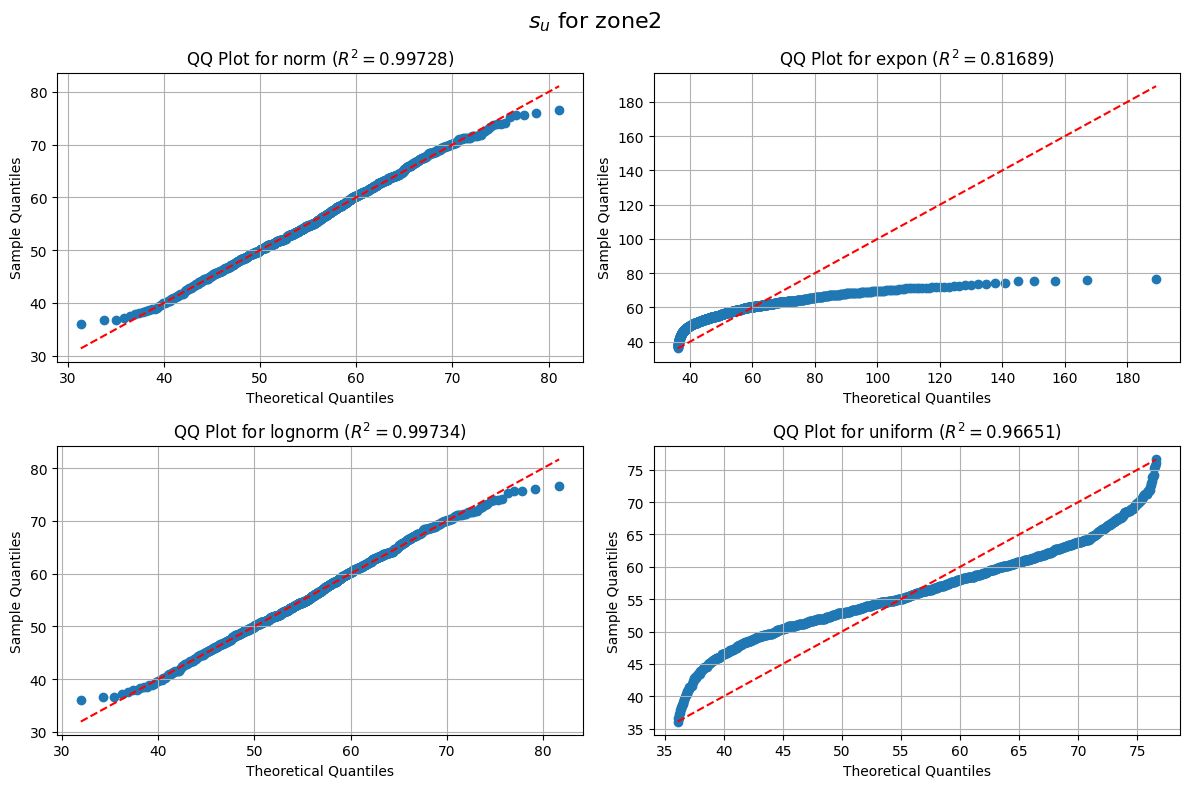

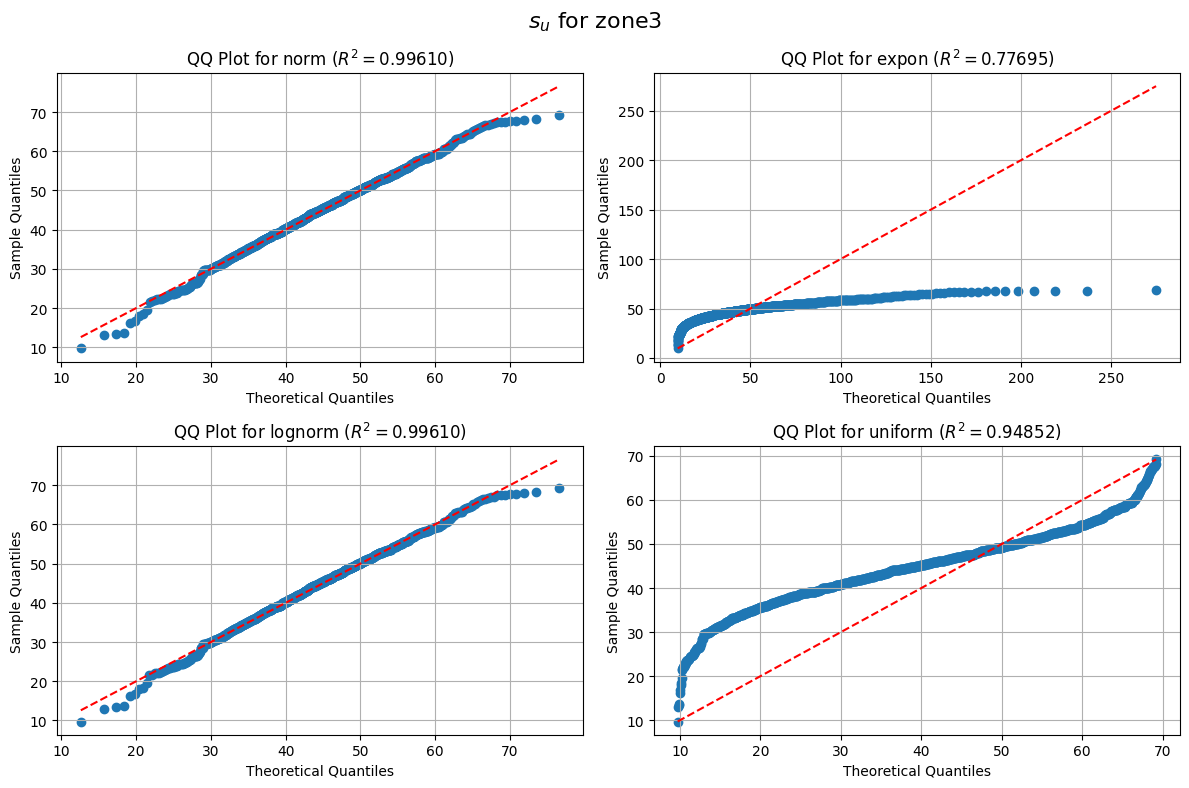

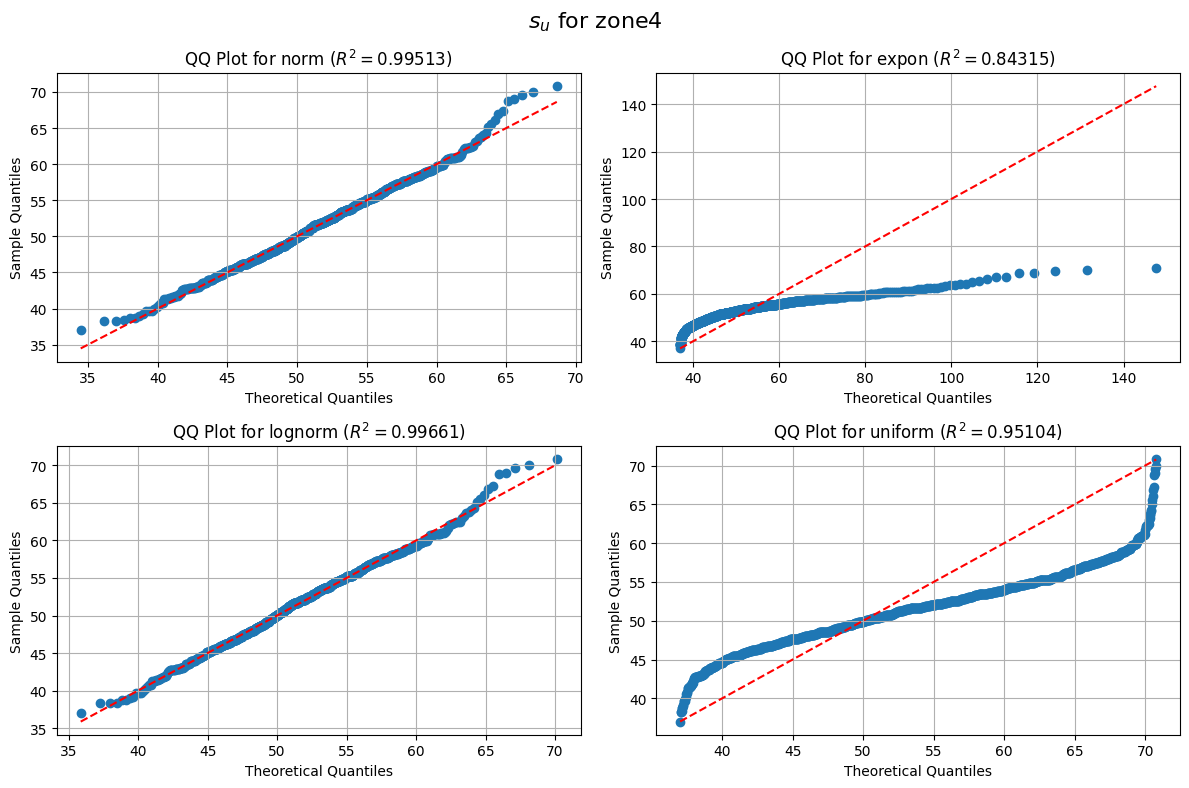

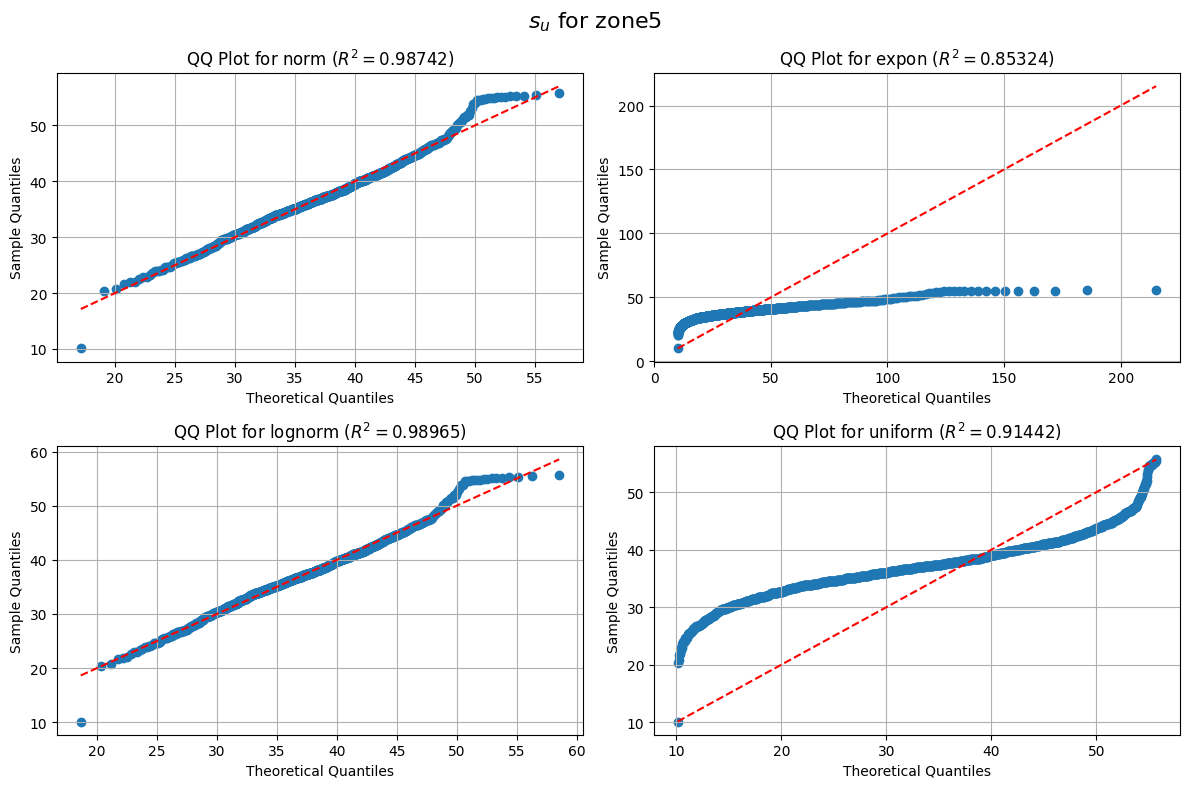

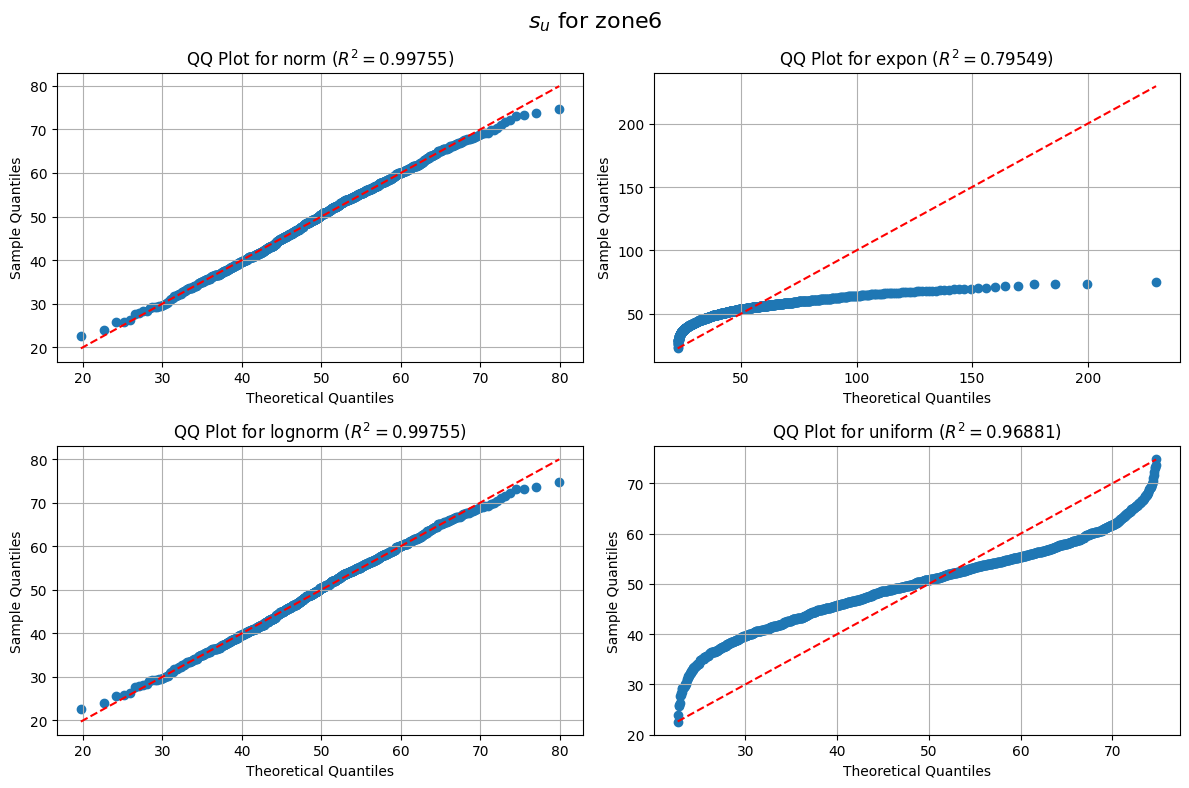

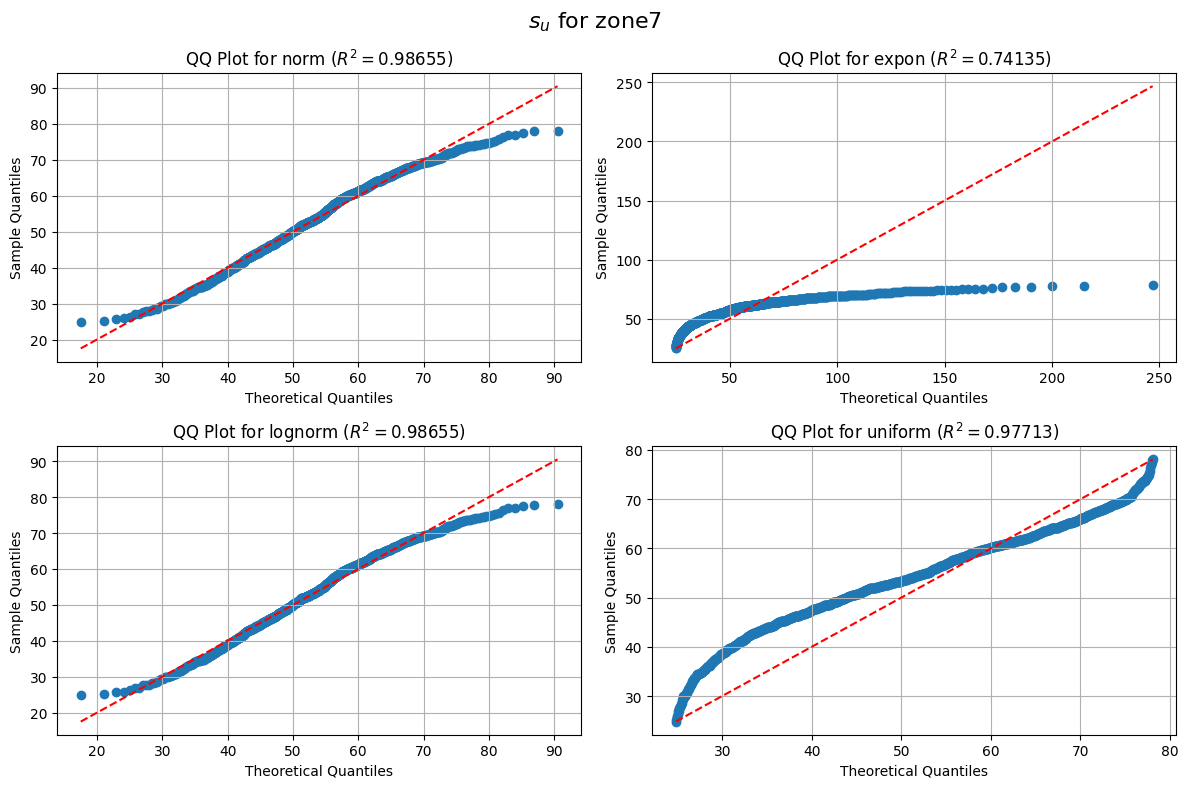

In [ ]:
for zone in zones:
    qqplotgeneratorsu(su[zone])

In [ ]:
def qqplotgeneratorgamma(data):
    data = data.sort_values()
    representative_probability = [(x-.5)/len(data) for x in range(1,len(data)+1)]

    distributions = [stats.norm, stats.expon, stats.lognorm, stats.uniform]

    plt.figure(figsize=(12, 8))
    plt.suptitle("$\gamma$ for " + data.name, fontsize=16)

# Iterate through the distributions
    for dist in distributions:
        plt.subplot(2, 2, distributions.index(dist) + 1)
    
    # Fit the distribution to your data
        param = dist.fit(data)
    
    # Create quantiles from the theoretical distribution
        theoretical_quantiles = dist.ppf(np.array(representative_probability), *param)

    # Create quantiles from your dataset
        sample_quantiles = np.array(data)
        # Assuming you have x_data and y_data
        params, covariance = curve_fit(linear_function, theoretical_quantiles,
                                       sample_quantiles, p0=[1, 0])
        ssr = np.sum((linear_function(theoretical_quantiles, *params) - sample_quantiles)**2)
        sst = np.sum((sample_quantiles - np.mean(sample_quantiles))**2)
        r_squared = 1 - (ssr / sst)
    # Create the QQ plot
        plt.scatter(theoretical_quantiles, sample_quantiles)
        plt.title(f'QQ Plot for {dist.name} ($R^2 = {r_squared:.5f}$)')
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Sample Quantiles")
        plt.grid(True)
    
    # Add a reference line
        plt.plot([min(theoretical_quantiles), max(theoretical_quantiles)], [min(theoretical_quantiles), max(theoretical_quantiles)], color='red', linestyle='--')

    plt.tight_layout()
    plt.show()

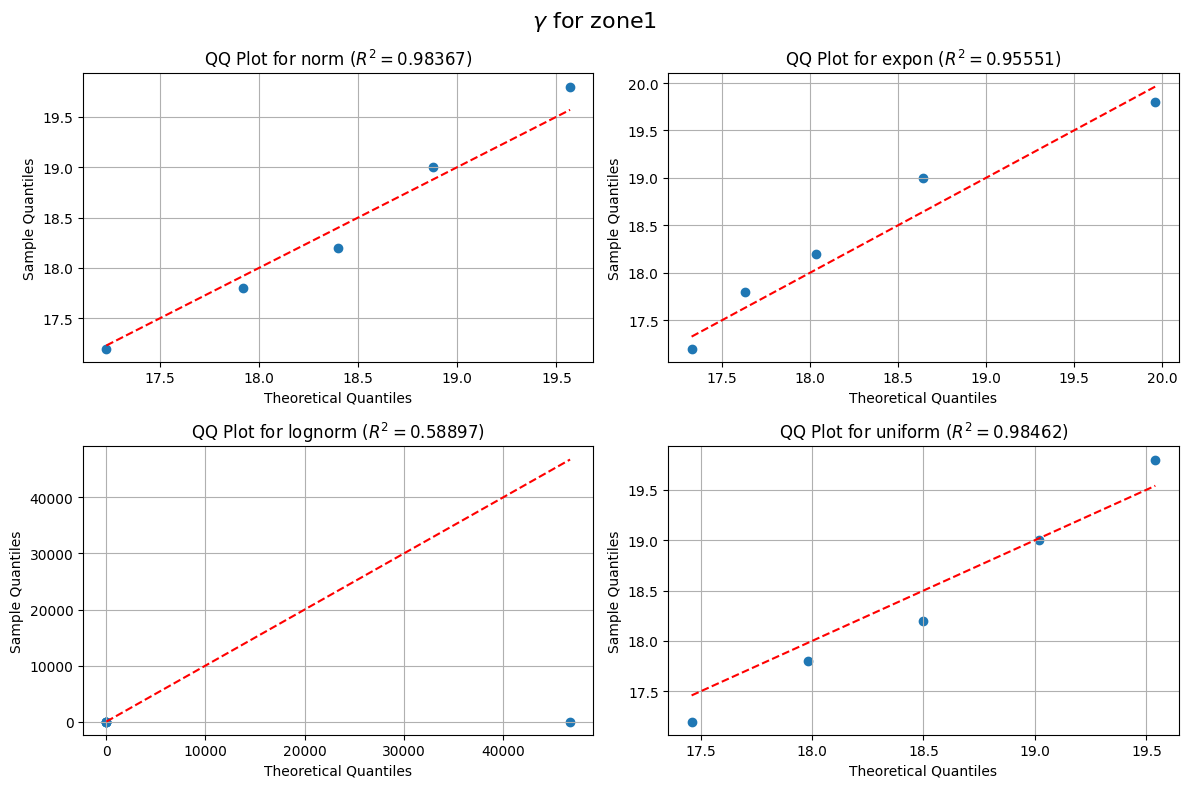

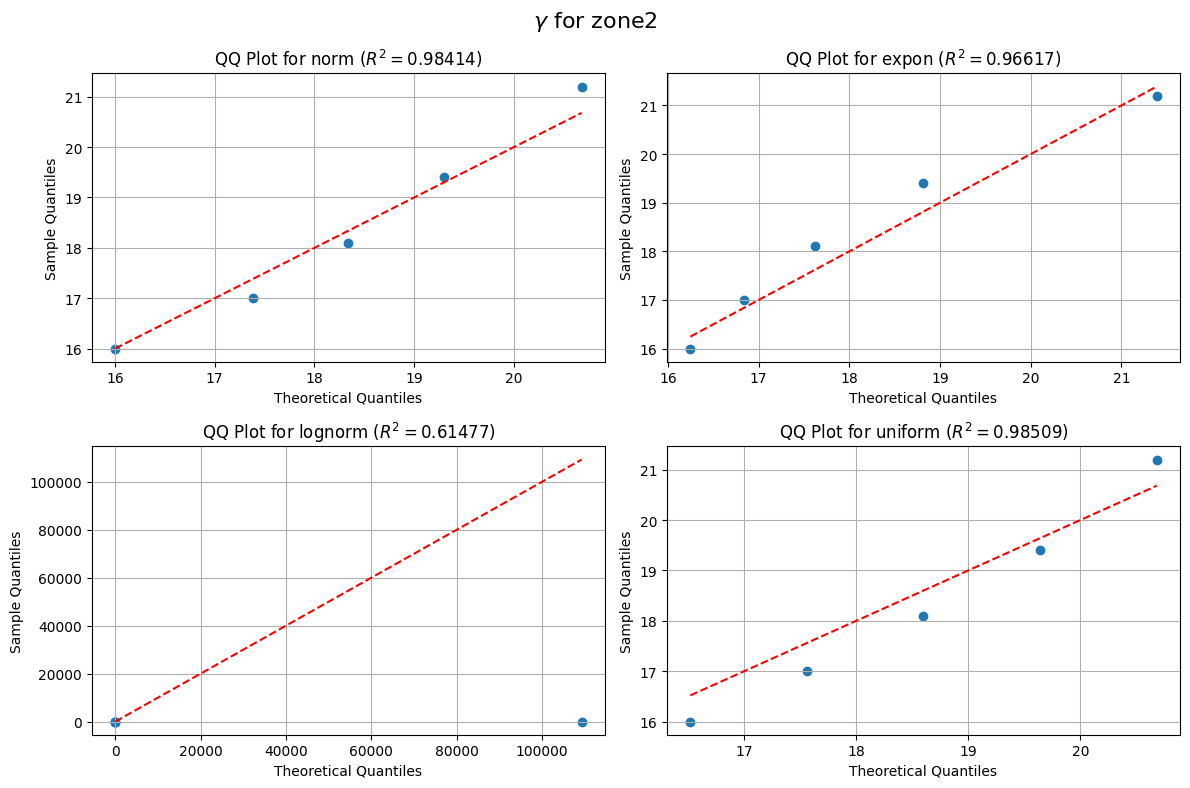

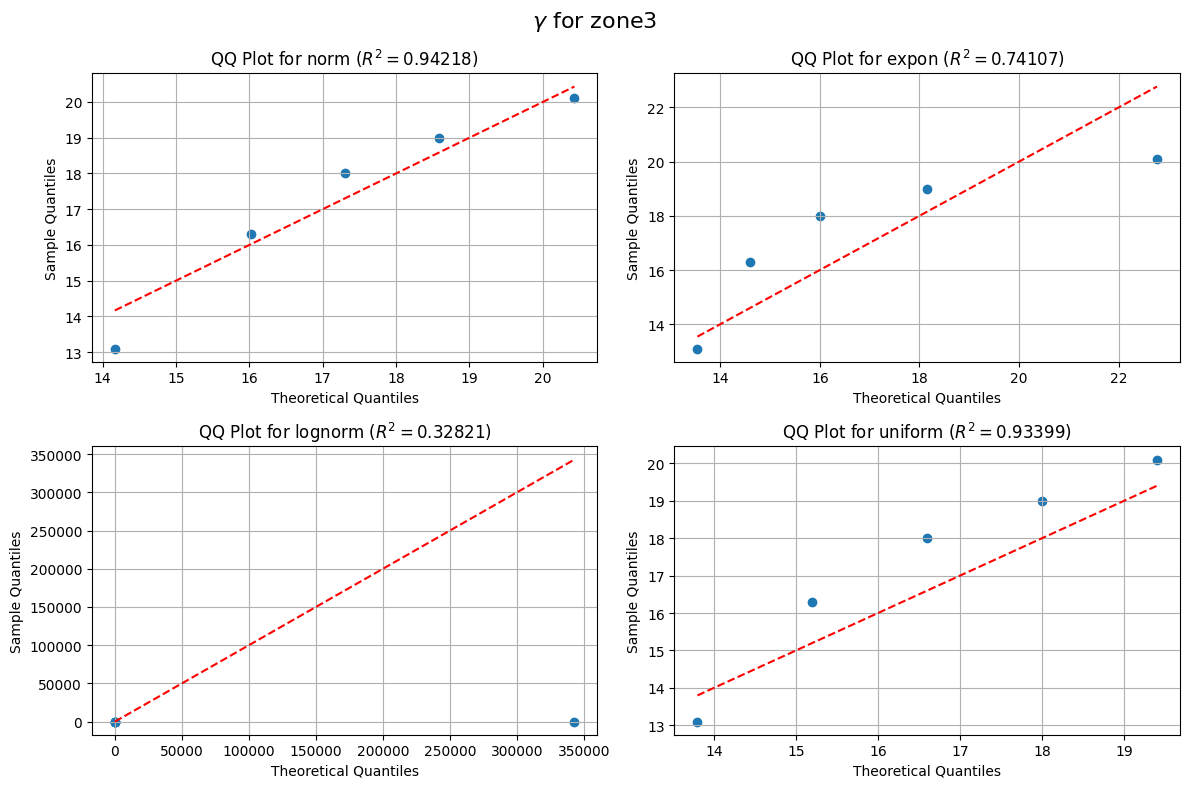

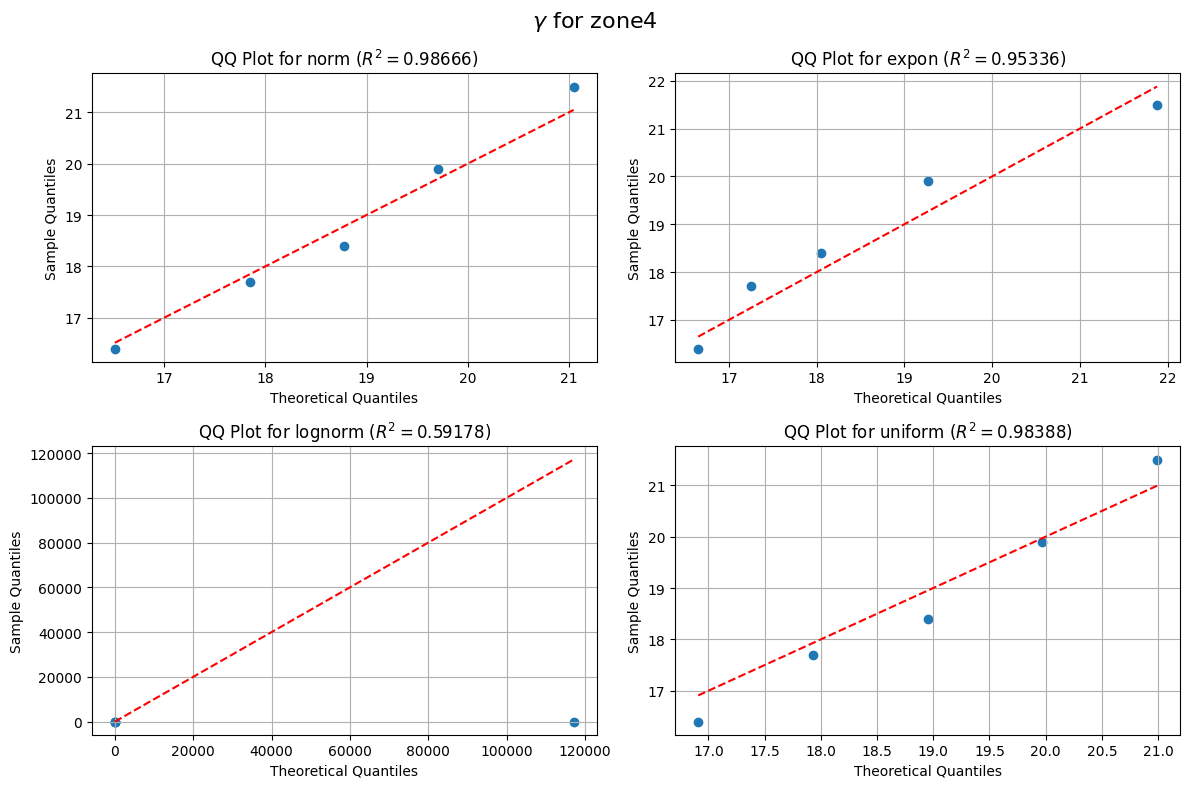

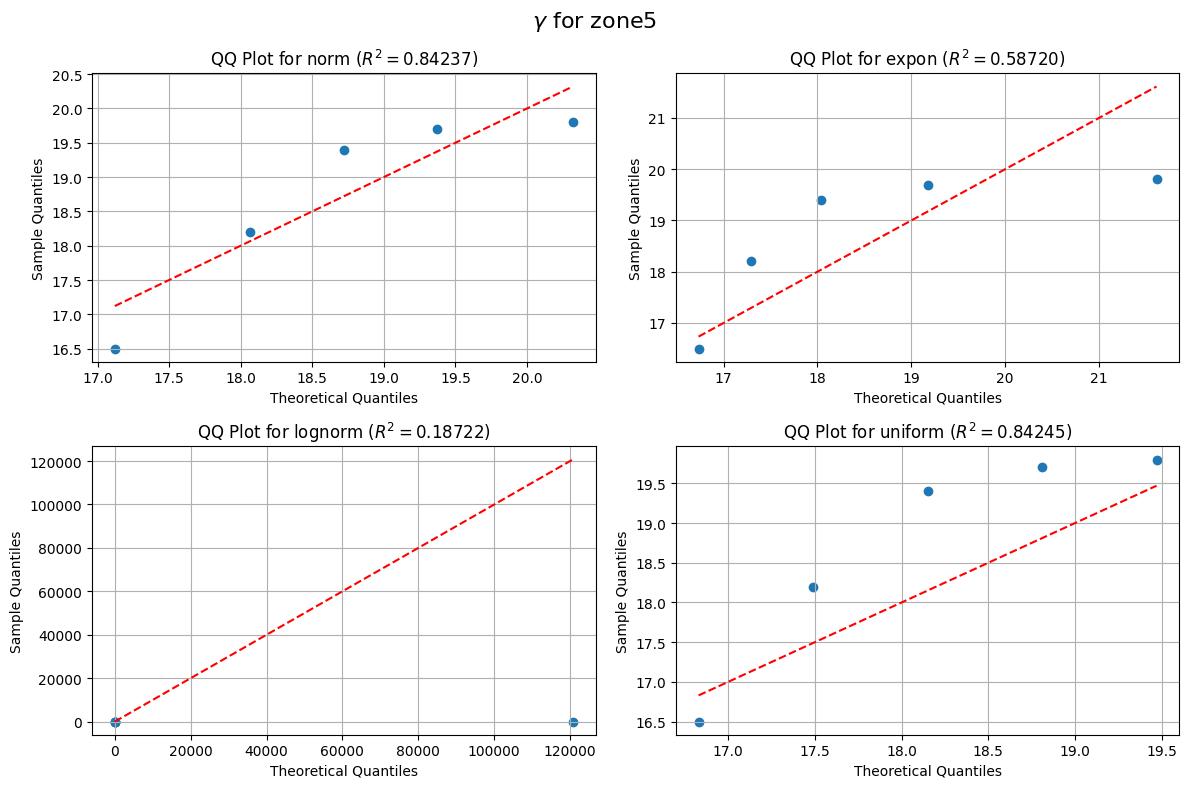

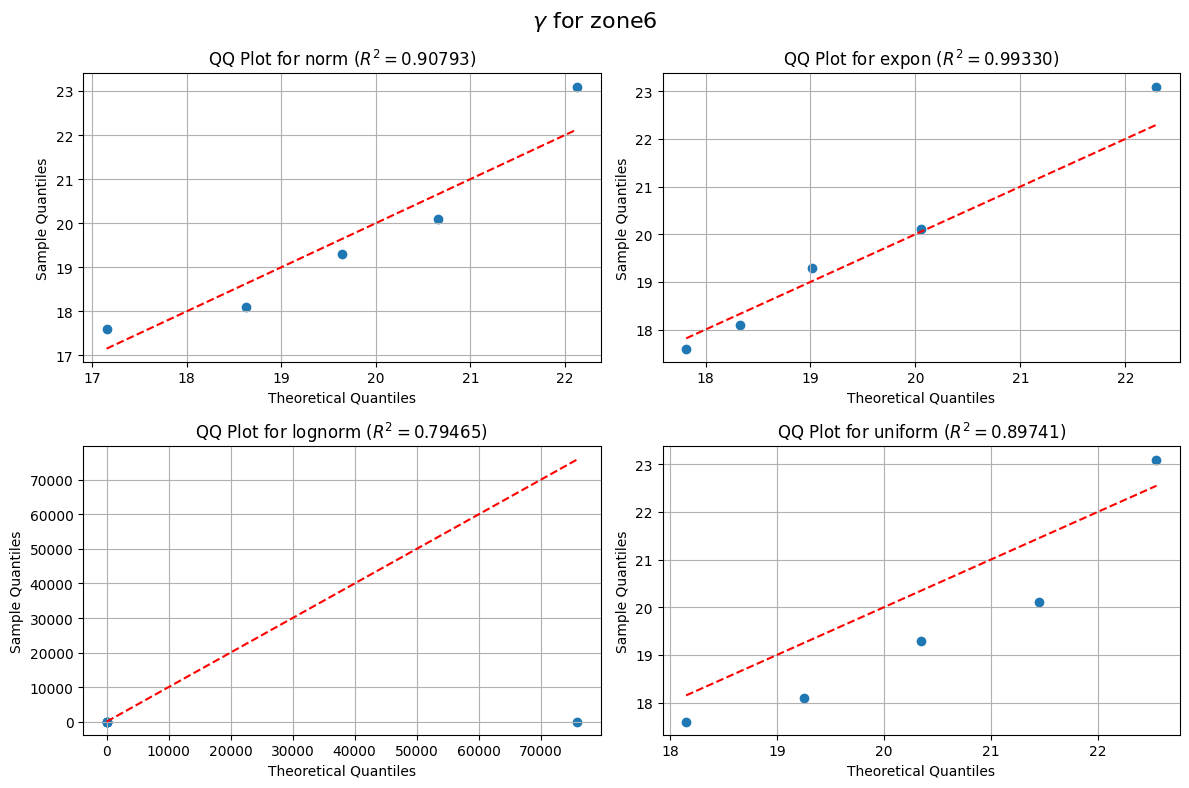

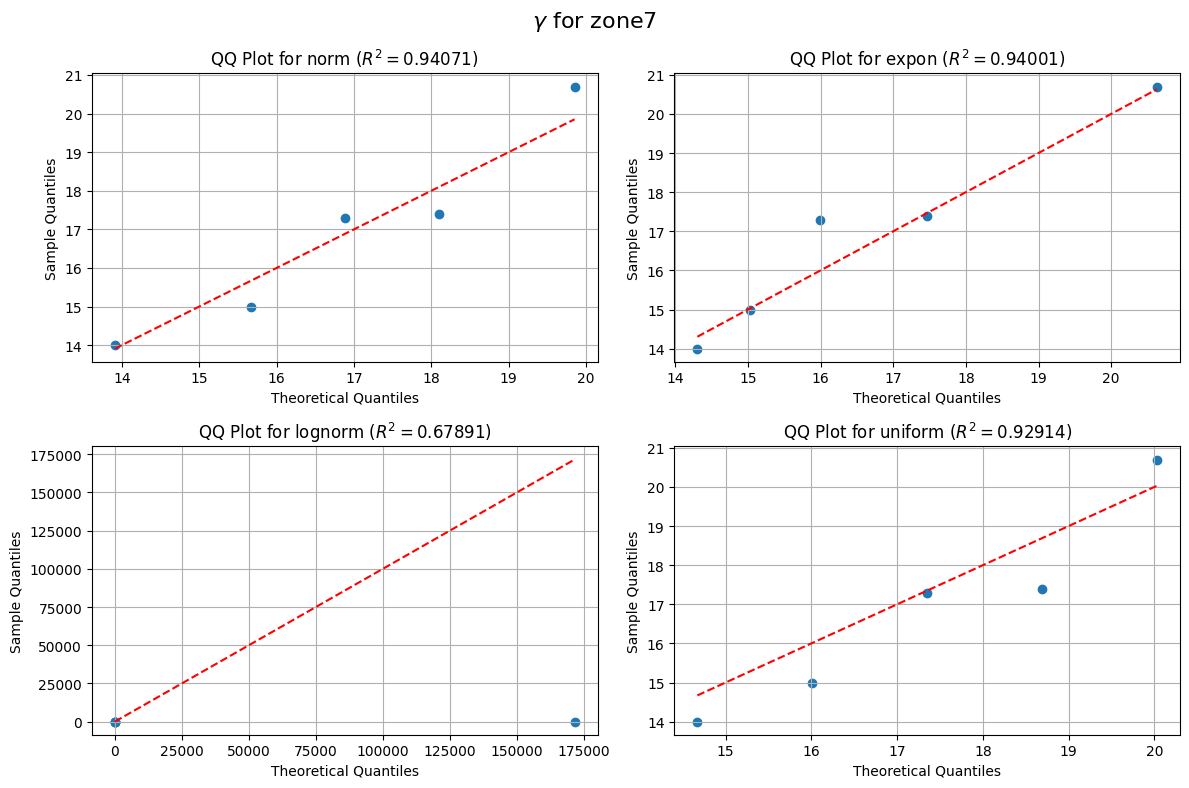

In [ ]:
for zone in zones:
    qqplotgeneratorgamma(gamma[zone])